In [35]:
# Test Accuracy
test_pred = np.zeros(n_test, dtype=np.int)
test_batches = int(math.ceil(n_test)/batch_size)

for test_batch in range(test_batches):
    batch_start = test_batch * batch_size
    test_x_batch = test_features[batch_start:batch_start+batch_size]
    test_y_true_batch = test_labels[batch_start:batch_start+batch_size]
    feed_dict_test = {x_image: test_x_batch, y_true: test_y_true_batch, keep_prob: 1}
    test_pred[batch_start:batch_start+batch_size] = session.run(y_pred_cls, feed_dict=feed_dict_test)

checks = (test_pred == y_test)
checks_sum = checks.sum()
test_accuracy = float(checks.sum()) / n_test

print("Test Accuracy: {0:.1%} ({1} / {2})".format(test_accuracy, checks_sum, n_test))

Test Accuracy: 96.0% (12131 / 12630)


In [37]:
saved = saver.save(session, "traffic_signs_gray.ckpt")

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

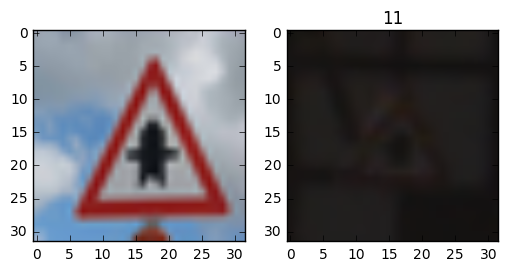

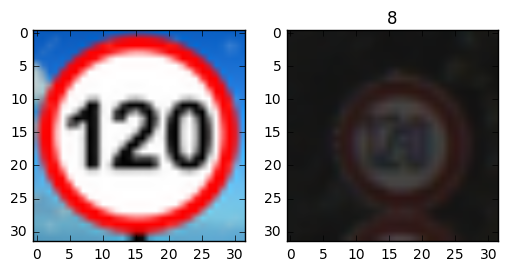

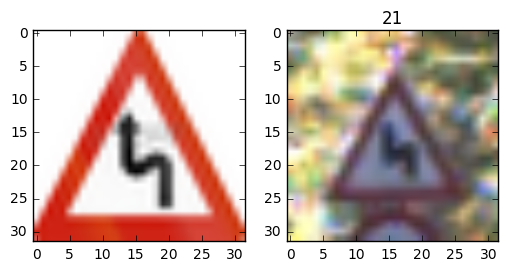

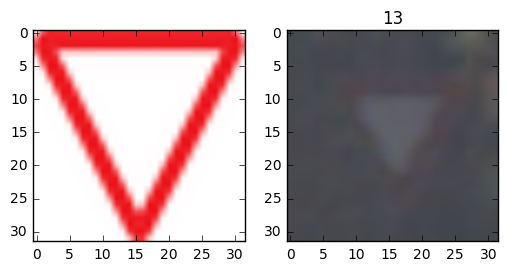

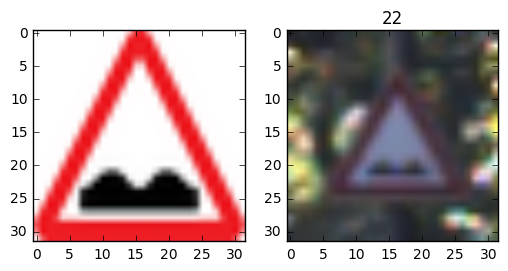

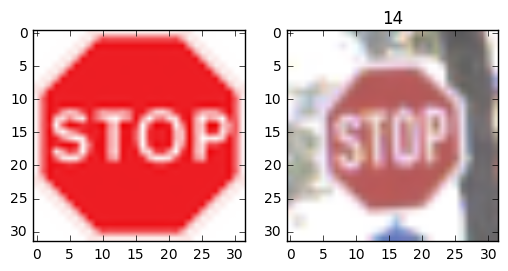

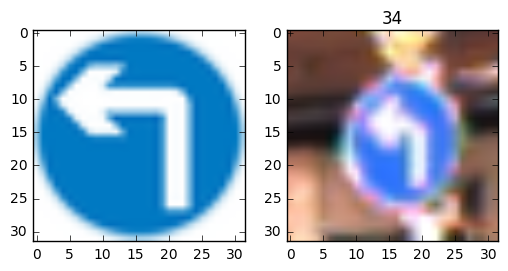

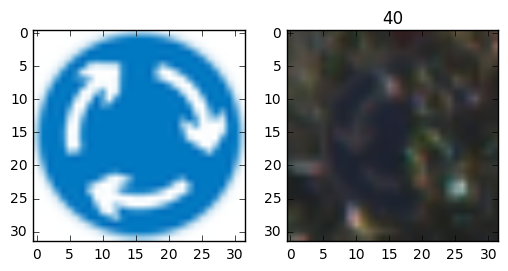

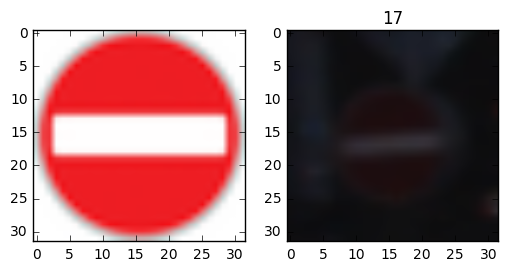

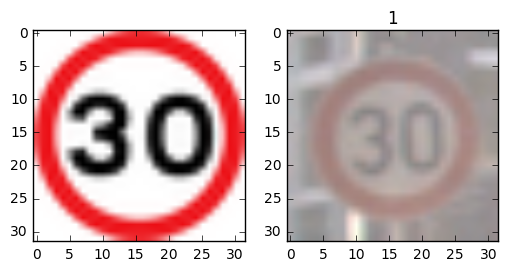

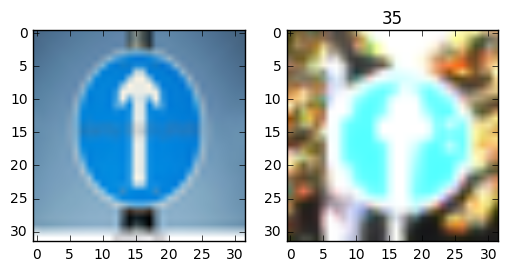

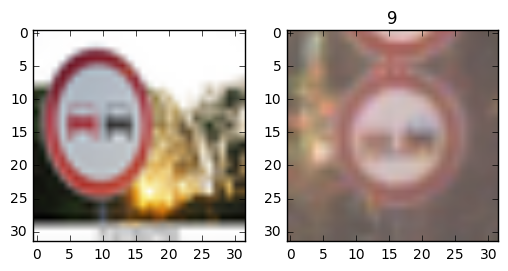

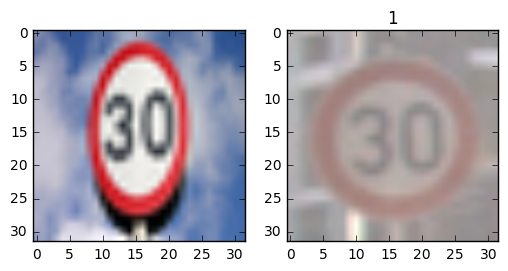

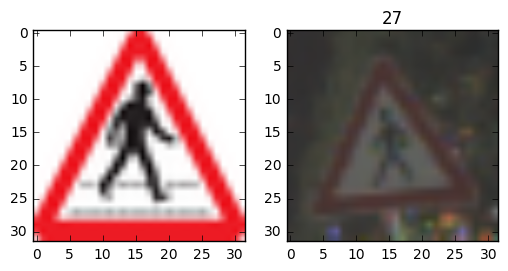

In [45]:
from PIL import Image
import glob
from numpy import array

images = []

for filename in glob.glob('/Users/NSN/Downloads/hi/*.jpg'): #assuming gif
    img=Image.open(filename)
    img = img.resize((32, 32),Image.ANTIALIAS)
    images.append(img)

extra_imgs = np.zeros([len(images),32,32,3], dtype=np.uint8)
for i in range(len(images)):
    extra_imgs[i]=array(images[i])


extra_labels = [11,8,21,13,22,14,34,40,17,1,35,9,1,27]

for index in range(len(extra_labels)):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    
    plt.imshow(extra_imgs[index])
    
    #display an image from the training set that matches
    
    img_val = extra_labels[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])
    plt.show()



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [47]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
### Run the predictions here.
### Feel free to use as many code cells as needed.
extra_imgs_norm = the_preprocessor(extra_imgs)
extra_labels_OHE = oneHotEncode_labels(extra_labels)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

pred_val = tf.argmax(logits, 1)

pred_softmax = tf.nn.softmax(logits)
pred_topFive = tf.nn.top_k(pred_softmax, k=5)

with tf.Session() as sess:
    
    # Restore variables from disk.
    saver.restore(sess, "traffic_signs_gray.ckpt")
    print("Model restored.")
    
    soln_vals, soln_topFive = sess.run([pred_val, pred_topFive], feed_dict={x_image:extra_imgs_norm, keep_prob: 1.})

    
print('soln_vals: ', soln_vals)

Model restored.
soln_vals:  [11  8 21 13 22 31  8 12 17  1 35 18  1 25]


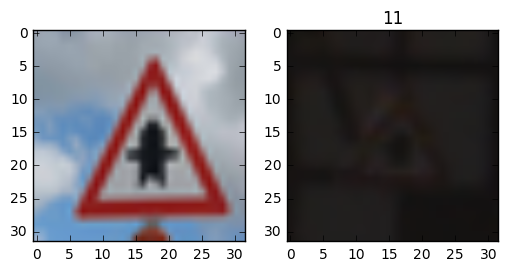

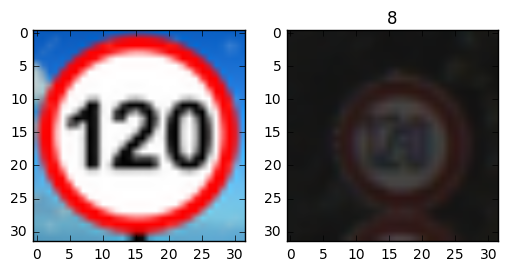

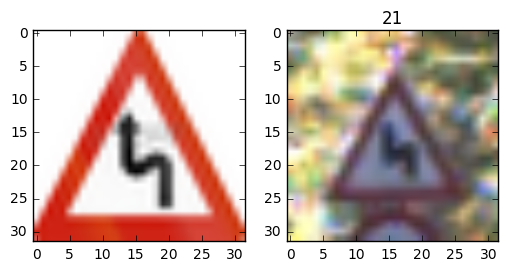

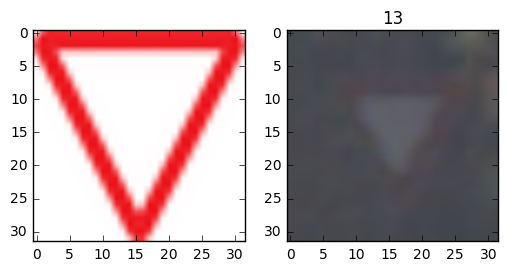

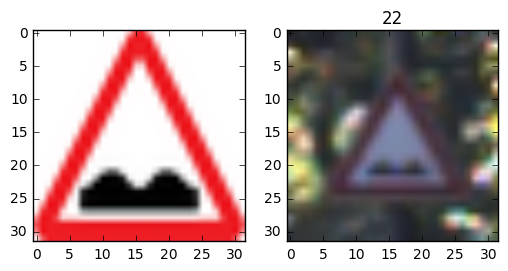

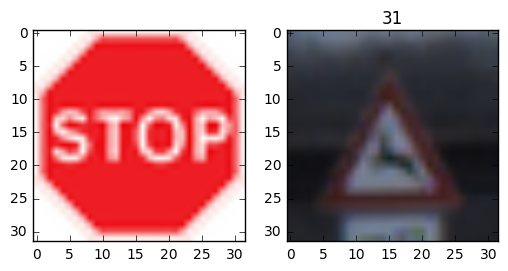

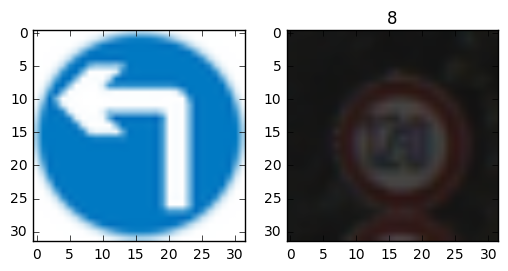

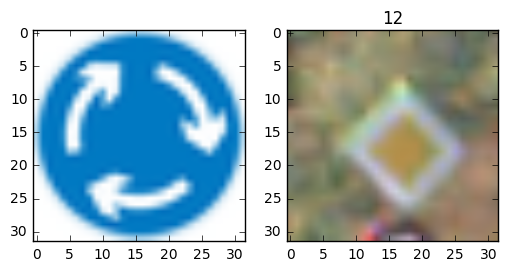

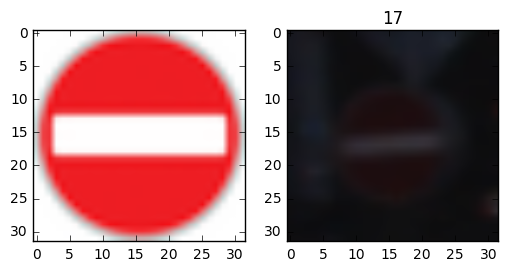

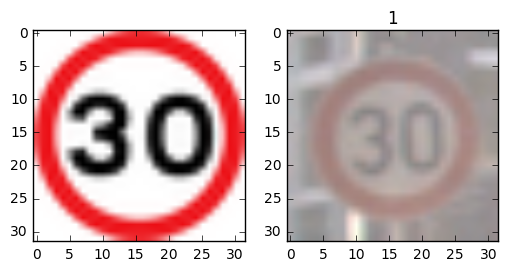

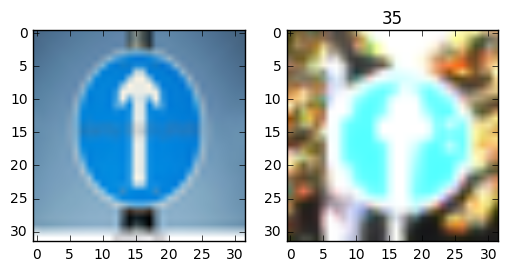

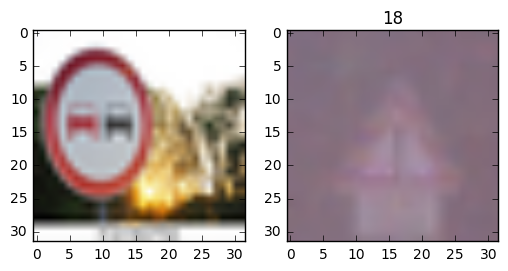

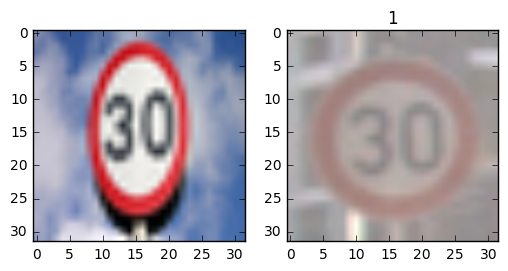

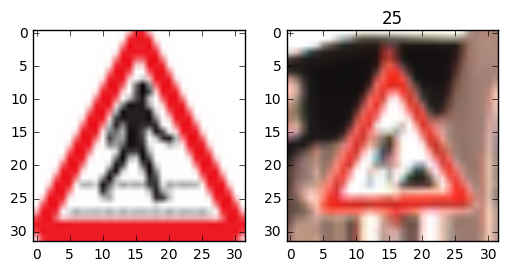

In [48]:
# display the result

for index in range(len(extra_labels)):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    
    plt.imshow(extra_imgs[index])
    
    #display an image from the training set that matches
    
    # display an image from the training set that matches
    img_val = soln_vals[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Lower Accuracy than coloured images model (9/14)

Background effect on classification has been eleiminated as the model predicts 120kmph and 30kmph  correctly



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [50]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
topFive_values = soln_topFive.values
topFive_indices = soln_topFive.indices

print(topFive_indices)

print('True Labels',extra_labels)



[[11 30  0  1  2]
 [ 8 31 21 16 10]
 [21  5 31 25 35]
 [13 35 15 25  9]
 [22 29 34 39 12]
 [31 35 25 18  0]
 [ 8 41  1 38  5]
 [12 17 32 38  7]
 [17 32 13  6 41]
 [ 1 31  5 18 10]
 [35  4 36 25 18]
 [18 25 38 41 12]
 [ 1  0  2  3  4]
 [25 27 30 20 40]]
True Labels [11, 8, 21, 13, 22, 14, 34, 40, 17, 1, 35, 9, 1, 27]


**Answer:**


The correct prediction occurs only for the last image in the top 5 predictions

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.